# Перестройка CNA

### Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

### Задание

### 1. Посмотрите на предоставленные файлы сегментов. Изучите колонки chrom, start, end, total, minor. Какое распределение сегментов по значению total? Определите значение total, которое имеет большинство сегментов в каждом из пациентов. Это значение можно грубо считать плоидностью (ploidy) образца.

In [ ]:
pat_1 = pd.read_csv('segments_pat_1.tsv', sep="\t", header=0)
pat_1.head()

,Unnamed: 0,chrom,start,end,n_mark,n_h_mark,seg_median,c_fraction,total,minor,...,seg_length_chr,seg_length_arm,segment_type,seg_merge_id,margin_segments,segment_cna_status,norm_total,LOH,segment_cna_combined,Sample
0,0,1,13453,941119,37,1,-0.498392,NaN,0,0.0,...,0.003726,0.007623,Focal,0,first,Gene loss,-2,True,Gene loss,pat_1
1,1,1,941120,3595321,2352,145,-0.448718,1.0,0,0.0,...,0.010661,0.021809,Focal,0,regular,Gene loss,-2,True,Gene loss,pat_1
2,2,1,3595371,16490694,3998,208,-0.283112,1.0,1,0.0,...,0.051798,0.105960,Arm,2,regular,Deletion,-1,True,Deletion,pat_1
3,3,1,16538965,16995982,325,13,-0.479391,1.0,1,0.0,...,0.001836,0.003755,Arm,2,regular,Deletion,-1,True,Deletion,pat_1
4,4,1,16996099,46413685,8397,454,-0.231263,1.0,1,0.0,...,0.118164,0.241722,Arm,2,regular,Deletion,-1,True,Deletion,pat_1


In [ ]:
pat_1.describe()

,Unnamed: 0,chrom,start,end,n_mark,n_h_mark,seg_median,c_fraction,total,minor,seg_length,seg_length_chr,seg_length_arm,seg_merge_id,norm_total
count,172.000000,172.000000,1.720000e+02,1.720000e+02,172.000000,172.000000,172.000000,137.0,172.000000,172.000000,1.720000e+02,172.000000,172.000000,172.000000,172.000000
mean,85.500000,10.645349,5.832444e+07,7.362613e+07,2483.581395,123.313953,-0.045537,1.0,1.930233,0.639535,1.530169e+07,0.113603,0.220206,84.906977,-1.011628
std,49.796252,6.077168,4.912156e+07,5.349128e+07,2696.809082,136.868722,0.348666,0.0,1.197372,0.538848,1.884834e+07,0.133526,0.257901,49.821583,0.572145
min,0.000000,1.000000,1.345300e+04,9.411190e+05,11.000000,0.000000,-1.576574,1.0,0.000000,0.000000,2.410000e+02,0.000002,0.000007,0.000000,-2.000000
25%,42.750000,6.000000,1.979908e+07,3.170956e+07,347.000000,13.750000,-0.220060,1.0,1.000000,0.000000,1.268200e+06,0.011414,0.019383,41.750000,-1.000000
50%,85.500000,10.500000,4.696210e+07,5.928861e+07,1719.000000,84.500000,0.021875,1.0,2.000000,1.000000,8.454337e+06,0.062557,0.112313,85.500000,-1.000000
75%,128.250000,16.000000,8.924413e+07,1.133794e+08,3567.500000,184.000000,0.116168,1.0,2.000000,1.000000,2.281303e+07,0.182742,0.335807,128.250000,-1.000000
max,171.000000,23.000000,2.400299e+08,2.486504e+08,13631.000000,654.000000,0.691427,1.0,6.000000,2.000000,1.084284e+08,0.644369,0.998190,171.000000,1.000000


In [ ]:
pat_1['total'].value_counts()

2    77
1    30
3    27
0    23
4     9
5     5
6     1
Name: total, dtype: int64

In [ ]:
pat_1['chrom'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23])

Колонка chrom указывает нам на номер хромосомы, представлены все хромосомы. Колона start указывает на начало сегмента. Total - общее кол-во копий. Minor - количество минорных аллелей. Total с наибольшей вероятностью принимает значения от 0 до 2. Самое часто встречамое значение total = 2. Проделаем те же самые наблюдения для других пациентов.

In [ ]:
pat_2 = pd.read_csv('segments_pat_2.tsv', sep="\t", header=0)
pat_2['total'].value_counts()

3     50
2     46
4     33
5     20
10    15
1      8
9      8
8      7
6      5
7      4
Name: total, dtype: int64

In [ ]:
pat_3 = pd.read_csv('segments_pat_3.tsv', sep="\t", header=0)
pat_3['total'].value_counts()

2     85
4     72
3     52
5     35
6     21
1     20
7      6
8      6
10     4
0      4
9      1
Name: total, dtype: int64

In [ ]:
pat_4 = pd.read_csv('segments_pat_4.tsv', sep="\t", header=0)
pat_4['total'].value_counts()

2    76
3    58
4    31
1    16
6    14
5    11
8     3
0     2
Name: total, dtype: int64

In [ ]:
pat_5 = pd.read_csv('segments_pat_5.tsv', sep="\t", header=0)
pat_5['total'].value_counts()

2    105
1     83
3     10
4      2
0      2
Name: total, dtype: int64

In [ ]:
# ЗАПОЛНИТЬ ТАБЛИЦУ
ploidy_df = pd.DataFrame(
    {
        'pat_1': 2,
        'pat_2': 3,
        'pat_3': 2,
        'pat_4': 2,
        'pat_5': 2,
    },
    index=[0]
)
ploidy_df

,pat_1,pat_2,pat_3,pat_4,pat_5
0,2,3,2,2,2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 2. Реализуйте функцию, которая визуализирует CNA сегменты по заданным параметрам chrom, start, stop. Ожидается график, где по оси X координата в геноме, а по оси Y - total (черным) и minor (красным) сегмента. Имейте в виду, что на заданный регион может приходиться несколько сегментов

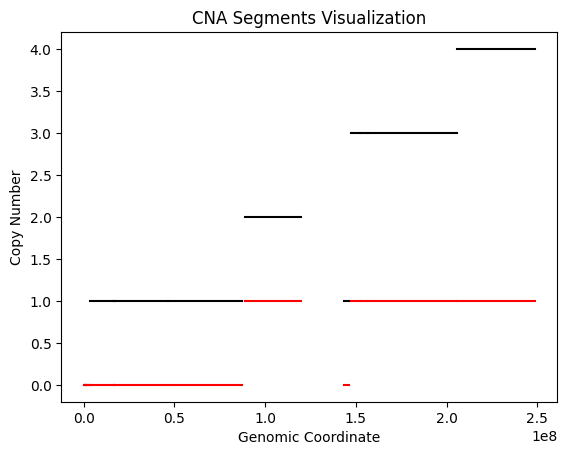

In [ ]:
def plot_cna_region(
    segments: pd.DataFrame, chromosome: str, start: int, stop: int,
    title: str
    ):
  """
  Plot total and minor segment lines for a given region in chromosome
  """
  fig, ax = plt.subplots()

  region_segments = segments[(segments['chrom'] == chromosome) & (segments['start'] >= start) & (segments['end'] <= stop)]

  for idx, segment in region_segments.iterrows():
      ax.plot([segment['start'], segment['end']], [segment['total'], segment['total']], color='black')
      ax.plot([segment['start'], segment['end']], [segment['minor'], segment['minor']], color='red')

  ax.set_xlabel('Genomic Coordinate')
  ax.set_ylabel('Copy Number')
  ax.set_title(title)

  plt.show()

# Пример использования функции
cna_data = pat_1

plot_cna_region(cna_data, 1, 0, 50**9	, 'CNA Segments Visualization')

### 3. Используя данные с сайта https://www.genecards.org/ собрать данные о следующих генах: FRY, BRCA2, MYC, ERBB2, RB1. Заполнить таблицу ниже:

In [ ]:
# ЗАПОЛНИТЬ
gene_coordinates_df = pd.DataFrame(
    {
        'FRY': {
            'start': 31_846_713,
            'end': 32_299_125,
            'chrom': 13
        },
        'BRCA2': {
            'start': 32_315_086,
            'end': 32_400_268,
            'chrom': 13
        },
        'MYC': {
            'start': 127_735_434,
            'end': 127_742_951,
            'chrom': 8
        },
        'ERBB2': {
            'start': 39_687_914,
            'end': 39_730_426,
            'chrom': 17
        },
        'RB1': {
            'start': 48_303_744,
            'end': 48_599_436,
            'chrom': 13
        }
    }
)
gene_coordinates_df

,FRY,BRCA2,MYC,ERBB2,RB1
start,31846713,32315086,127735434,39687914,48303744
end,32299125,32400268,127742951,39730426,48599436
chrom,13,13,8,17,13


### 4.1 Визуализируйте сегменты в пределах координат пяти генов для предоставленных образцов. Используйте plt.subplots() чтобы построить графики в рамках одного графика

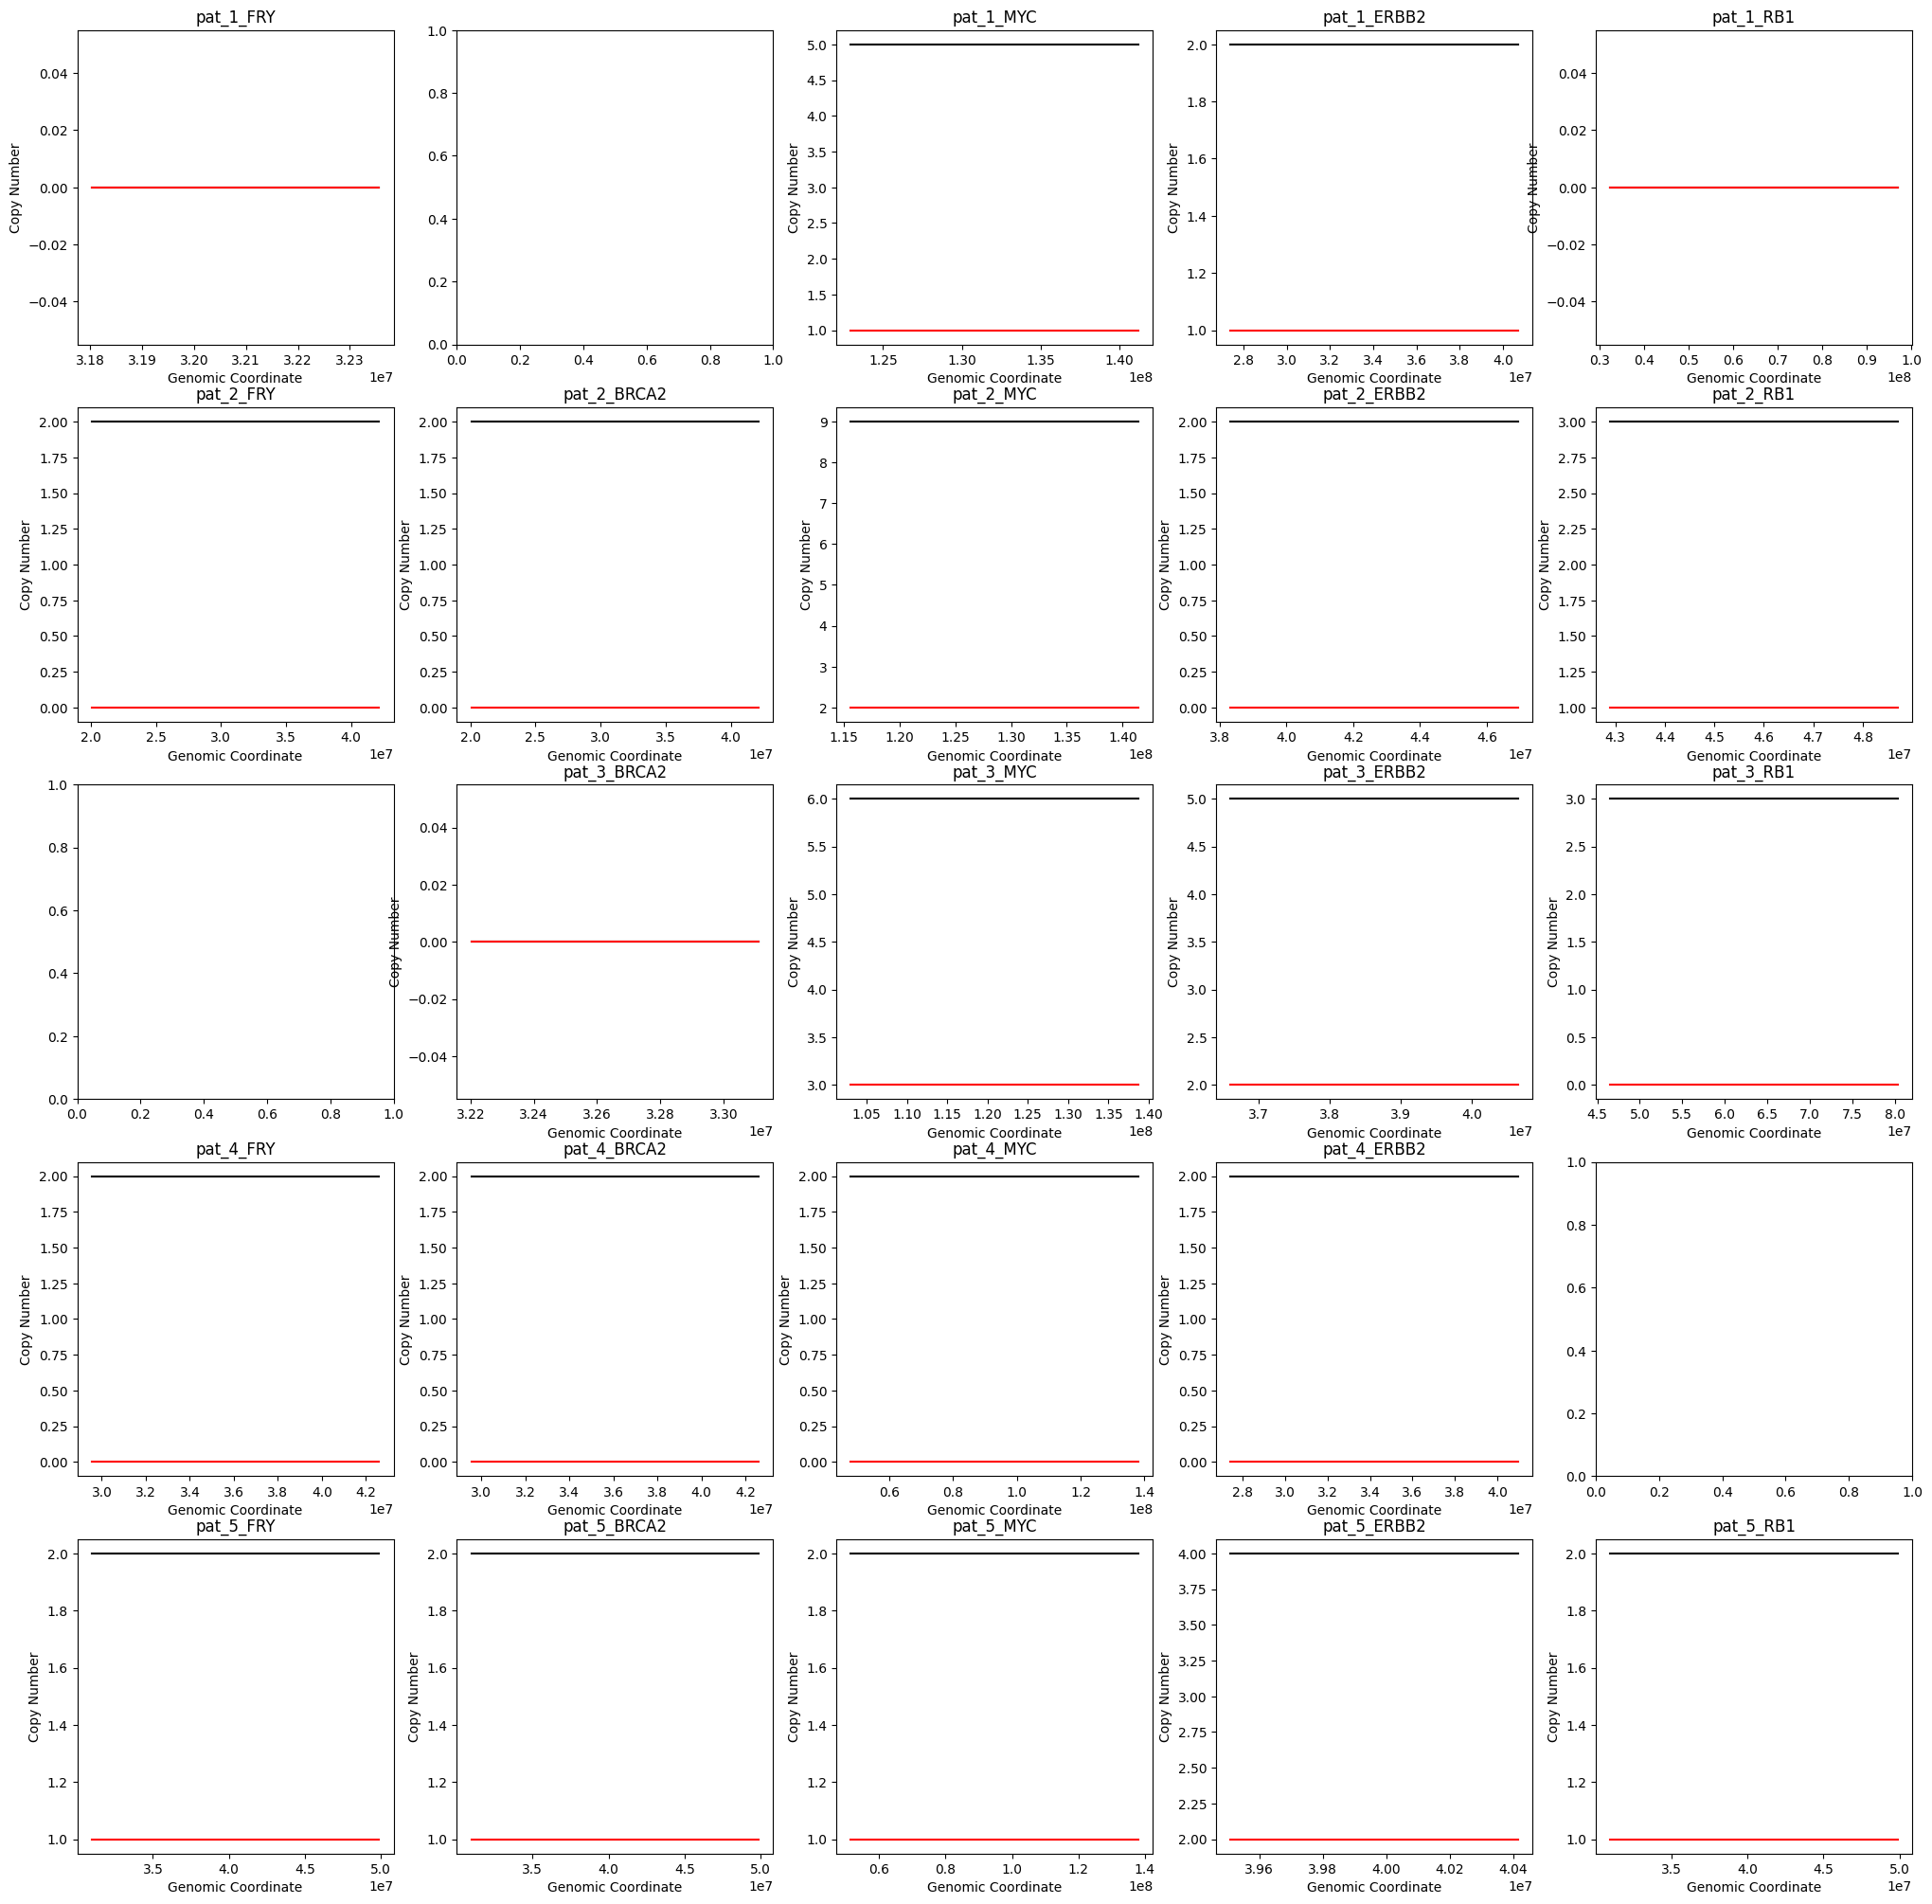

In [ ]:
fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(25, 25))

pats = [pat_1, pat_2, pat_3, pat_4, pat_5]

for j in range(5):

  i = 0

  for column in gene_coordinates_df.columns:

      start = gene_coordinates_df[f'{column}'][0]
      end = gene_coordinates_df[f'{column}'][1]
      chrom = gene_coordinates_df[f'{column}'][2]

      segments = pats[j]

      region_segments = segments[(segments['chrom'] == chrom) & (segments['start'] <= start) & (segments['end'] >= end)]

      for idx, segment in region_segments.iterrows():
          axs[j, i].plot([segment['start'], segment['end']], [segment['total'], segment['total']], color='black')
          axs[j, i].plot([segment['start'], segment['end']], [segment['minor'], segment['minor']], color='red')

          axs[j, i].set_xlabel('Genomic Coordinate')
          axs[j, i].set_ylabel('Copy Number')
          axs[j, i].set_title(f'pat_{j+1}_{column}')
      i += 1

plt.show()

### 4.2 Используя колонку **segment_cna_status** из файла с сегментами определите статус гена. Если на ген накладывается несколько генов, возьмите статус сегмента, который больше всего пересекается с геном. Заполните таблицу ниже

In [ ]:
segments = pat_3
region_segments = segments[(segments['chrom'] == 8) & (segments['start'] <= 127_735_434) & (segments['end'] >= 127_742_951)]
region_segments

,Unnamed: 0,chrom,start,end,n_mark,n_h_mark,seg_median,c_fraction,total,minor,...,seg_length_chr,seg_length_arm,segment_type,seg_merge_id,margin_segments,segment_cna_status,norm_total,LOH,segment_cna_combined,Sample
121,121,8,103055931,138724690,1168,112,0.501038,1.0,6,3.0,...,0.245756,0.364195,Long_focal,121,regular,Gain,1,False,Gain,pat_3


In [ ]:
region_segments['segment_cna_status']

121    Gain
Name: segment_cna_status, dtype: object

In [ ]:
# ЗАПОЛНИТЬ
gene_statuses_df = pd.DataFrame(
    {
        'pat_1':{
            'FRY': 'Gene loss', 'BRCA2': 'Gene loss', 'MYC': 'Gain',
            'ERBB2': 'Deletion', 'RB1': 'Gene loss',
        },
        'pat_2':{
            'FRY': 'Deletion', 'BRCA2': 'Deletion', 'MYC': 'High-level amplification',
            'ERBB2': 'Deletion', 'RB1': 'Neutral',
        },
        'pat_3':{
            'FRY': 'Gene loss', 'BRCA2': 'Gene loss', 'MYC': 'Gain',
            'ERBB2': 'Gain', 'RB1': 'Deletion',
        },
        'pat_4':{
            'FRY': 'Deletion', 'BRCA2': 'Deletion', 'MYC': 'Deletion',
            'ERBB2': 'Gain', 'RB1': 'Gene loss',
        },
        'pat_5':{
            'FRY': 'Neutral', 'BRCA2': 'Neutral', 'MYC': 'Neutral',
            'ERBB2': 'Amplification', 'RB1': 'Neutral',
        },
    }
)
gene_statuses_df

,pat_1,pat_2,pat_3,pat_4,pat_5
FRY,Gene loss,Deletion,Gene loss,Deletion,Neutral
BRCA2,Gene loss,Deletion,Gene loss,Deletion,Neutral
MYC,Gain,High-level amplification,Gain,Deletion,Neutral
ERBB2,Deletion,Deletion,Gain,Gain,Amplification
RB1,Gene loss,Neutral,Deletion,Gene loss,Neutral


### 5.1 В онкологии биомаркерные гены разделяют на онкогены и онкосупрессоры. Опишите 1-2 предложениями эти два понятия

**Онкоген** - это гены, мутации в которых могут приводить к не контролируемому клеточному делению и развитию опухолей. Они могут быть активированы либо усилением их функции, либо потерей негативного регулятора.  \\
**Онкосупрессор** - это являются генами, чье нормальное функционирование подавляет возникновение опухолей. Их инактивация или потеря функции может способствовать развитию рака.

### 5.2 Предположите классификацию исследованных генов. Обоснуйте ваш выбор

**ОПИШИТЕ ВАШ ВЫБОР**

FRY - онкоупрессор \\
BRCA2 - онкоупрессор \\
MYC - онкоген \\
ERBB2 - онкоген \\
RB1 - онкоупрессор \\

Такой выбор я сделала проанализировав полученную таблицу, где больше Gain или Amplification - тот онкоген, где больше Deletion или Gene Loss - тот онкосупрессор. Это следуюет из определений онкогена и онкосупрессора

### 6. Подробнее посмотрите на пару FRY, BRCA2. Нарисуйте график, на котором будут видны оба гена. Обозначьте границы каждого из генов вертикальными линиями. Подумайте, что произошло в **pat_1**, к чему привело данные событие? Как это может повлиять на экспрессию этих генов?

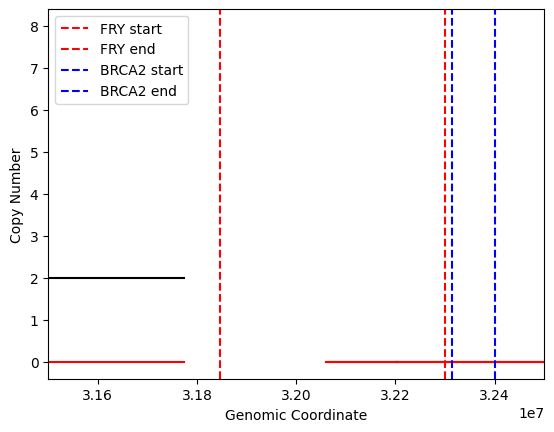

In [ ]:
start_fry = gene_coordinates_df[f'FRY'][0]
end_fry = gene_coordinates_df[f'FRY'][1]
chrom_fry = gene_coordinates_df[f'FRY'][2]

start_brca = gene_coordinates_df[f'BRCA2'][0]
end_brca = gene_coordinates_df[f'BRCA2'][1]
chrom_brca = gene_coordinates_df[f'BRCA2'][2]

fig, ax = plt.subplots()

segment = pat_1

region_segments = segments[(segments['chrom'] == chrom_fry) & (segments['start'] >= 0) & (segments['end'] <= 1_000_000_000)]

for idx, segment in region_segments.iterrows():
    ax.plot([segment['start'], segment['end']], [segment['total'], segment['total']], color='black')
    ax.plot([segment['start'], segment['end']], [segment['minor'], segment['minor']], color='red')

ax.axvline(x=start_fry, color='red', linestyle='--', label='FRY start')
ax.axvline(x=end_fry, color='red', linestyle='--', label='FRY end')
ax.axvline(x=start_brca, color='blue', linestyle='--', label='BRCA2 start')
ax.axvline(x=end_brca, color='blue', linestyle='--', label='BRCA2 end')

ax.set_xlabel('Genomic Coordinate')
ax.set_ylabel('Copy Number')
plt.xlim(31_500_000, 32_500_000)
ax.legend()

plt.show()

ОТВЕТЫ НА ВОПРОСЫ по заданию 6

Видимо BRCA2 и FRY были потеряны, что соответствует записям в таблице. Потеря генов FRY и BRCA2 может иметь серьезные последствия для клеток и организма в целом. Например, ген BRCA2 известен как онкосупрессорный ген, ответственный за ремонт ДНК и предотвращение развития рака. Поэтому его потеря может увеличить риск развития рака. Делеция могла произойти из-за ошибок рекомбинации